In [15]:
import kagglehub
import numpy as np
import csv

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

import matplotlib.pyplot as plt

In [2]:
# Download latest version of dataset
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sms-spam-collection-dataset' dataset.
Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [8]:
# Load and preprocess dataset
dataset_path = "/kaggle/input/sms-spam-collection-dataset/spam.csv"

with open(dataset_path, 'r', encoding='latin-1') as f:
    reader = csv.reader(f)
    rows = list(reader)

if rows[0][0].lower() == "v1":
    rows = rows[1:]

data = np.array([[r[0], r[1]] for r in rows], dtype=object)
labels = data[:, 0]
messages = data[:, 1]

labels = np.where(labels == "spam", 1, 0)
print(labels.shape)
print(messages.shape)

(5572,)
(5572,)


In [9]:
# Split and vectorize dataset
X_train, X_test, y_train, y_test = train_test_split(messages, labels, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [17]:
# Train model based on regularization strength
C_values = [0.01, 0.1, 1, 10, 100]
results = {
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1": []
}

for C in C_values:
    model = LogisticRegression(max_iter=200, C=C, solver="liblinear")
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)

    acc = accuracy_score(y_test, preds)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_test, preds, average="binary", zero_division=0
    )

    results["accuracy"].append(acc)
    results["precision"].append(prec)
    results["recall"].append(rec)
    results["f1"].append(f1)

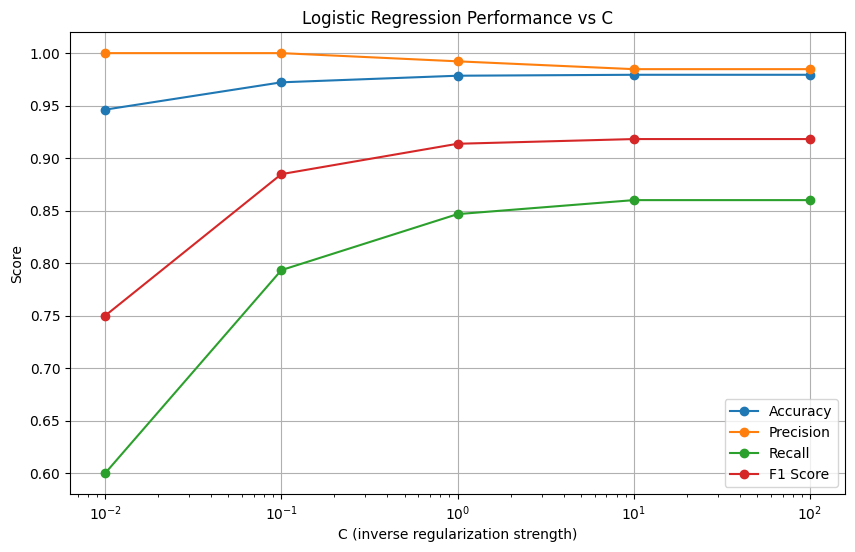

In [19]:
# Evaluate model
plt.figure(figsize=(10,6))

plt.plot(C_values, results["accuracy"], marker='o', label="Accuracy")
plt.plot(C_values, results["precision"], marker='o', label="Precision")
plt.plot(C_values, results["recall"], marker='o', label="Recall")
plt.plot(C_values, results["f1"], marker='o', label="F1 Score")

plt.xscale('log')
plt.xlabel("C (inverse regularization strength)")
plt.ylabel("Score")
plt.title("Logistic Regression Performance vs C")
plt.grid(True)
plt.legend()

plt.show()


The C value (inverse regularization strength) impacts the loss function in logistic regression by regularizing the process. This can prevent overfitting and can keep weights relatively low. However, the larger C is, the less regularization occurs, leading to possible overfitting.